### Importing libraries

In [1]:
import sklearn
import matplotlib.pyplot as plt
import time
import cv2
from scipy import ndimage, misc
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
!pip install ipynb
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=ac79f80d3777e89a7c78de04285ce1f098fe49a55724be0cf05a01e6be55c24c
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
!pip install kora -q
from kora import drive
drive.link_nbs()

     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
Mounted at /content/drive


In [4]:
import SiameseModel
import logging
from tensorflow.keras.callbacks import TensorBoard
from PIL import Image
import numpy as np
import time
import os
import sys
from SiameseModel import Recognizer
import logging
import tensorflow as tf
from tensorflow.keras import models

importing Jupyter notebook from /nbs/SiameseModel1_try.ipynb


### Image Dimensions

In [5]:
data_dimension = 128

### Input and target vectors

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# Loading input and target vectors

X1 = np.load('/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/Output_folder/x1.npy')
X2 = np.load('/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/Output_folder/x2.npy')
Y = np.load('/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/Output_folder/y.npy')

# Reshaping the target vectors
X1 = X1.reshape( ( X1.shape[0]  , data_dimension**2 * 3  ) ).astype( np.float32 )
X2 = X2.reshape( ( X2.shape[0]  , data_dimension**2 * 3  ) ).astype( np.float32 )

print( X1.shape )
print( X2.shape )
print( Y.shape )

(10000, 49152)
(10000, 49152)
(10000,)


In [8]:
# Getting trainning and validation data
random_numbers = np.random.rand(10000, 5)
indices = np.random.permutation(random_numbers.shape[0])
training_idx, test_idx = indices[:8000], indices[8000:]

X1_train = X1[training_idx,:]
X1_val = X1[test_idx,:]
X2_train = X2[training_idx,:]
X2_val = X2[test_idx,:]
y_train =  Y[training_idx]
y_val = Y[test_idx]

In [9]:

print("The shape of first training array is ", X1_train.shape)
print("The shape of second training array is ", X2_train.shape)
print("The shape of first validation array is ", X1_val.shape)
print("The shape of second validation array is ", X2_val.shape)
print("The shape of training labels are ", y_train.shape)
print("The shape of validation labels are ", y_val.shape)

The shape of first training array is  (8000, 49152)
The shape of second training array is  (8000, 49152)
The shape of first validation array is  (2000, 49152)
The shape of second validation array is  (2000, 49152)
The shape of training labels are  (8000,)
The shape of validation labels are  (2000,)


### Training and saving the model

In [16]:
# Creating an instance of siamese model
recognizer = Recognizer()

In [17]:
model_name = 'model.h5'

In [18]:
# from tensorflow.keras.callbacks import EarlyStopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode = 'min')
monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')

In [19]:
# Defining hyper parameters
parameters = {
    'batch_size' : 6 ,
    'epochs' : 100 ,
    'callbacks' : [early_stop, monitor],
    'val_data' : ([X1_val, X2_val], y_val),
    'verbose' : 1
}

# Training the siamese model
recognizer.fit( [ X1_train , X2_train ], y_train, hyperparameters = parameters)

Epoch 1/100
1334/1334 [==============================] - 80s 60ms/step - loss: 0.4138 - val_loss: 0.2664
Epoch 2/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2478 - val_loss: 0.2172
Epoch 3/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2011 - val_loss: 0.1817
Epoch 4/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2038 - val_loss: 0.1818
Epoch 5/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.1821 - val_loss: 0.1646
Epoch 6/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2088 - val_loss: 0.2986
Epoch 7/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2830 - val_loss: 0.2724
Epoch 8/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2626 - val_loss: 0.2584
Epoch 9/100
1334/1334 [==============================] - 79s 59ms/step - loss: 0.2589 - val_loss: 0.2924
Epoch 10/100
1334/1334 [==============================]

In [20]:
# saving the model
recognizer.save_model(model_name)

### Loading images from directory

In [21]:

dir_path_custom_images = input( 'Enter images directory path for custom images : ') #/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/Test_Images/
dir_path_class1_images = input( 'Enter images directory path for first class images : ') #/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Chetana/
dir_path_class2_images = input( 'Enter images directory path for second class images : ') #/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Prabhleen/
dir_path_class3_images = input( 'Enter images directory path for third class images : ') #/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Sanyam/
dir_path_class4_images = input( 'Enter images directory path for fourth class images : ') #/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Taruneesh/
dir_path_class5_images = input( 'Enter images directory path for fifth class images : ') #/content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Neha/
    

Enter images directory path for custom images : /content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/Test_Images/
Enter images directory path for first class images : /content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Chetana/
Enter images directory path for second class images : /content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Prabhleen/
Enter images directory path for third class images : /content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Sanyam/
Enter images directory path for fourth class images : /content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Taruneesh/
Enter images directory path for fifth class images : /content/gdrive/MyDrive/ENEL645/ProjectSiameseModel/augmented_dataset/Neha/


In [22]:
# storing the numpy arrays of all images
custom_images, list_true_labels = recognizer.prepare_images_from_dir_classes( dir_path_custom_images  )
class_1_images = recognizer.prepare_images_from_dir( dir_path_class1_images )
class_2_images = recognizer.prepare_images_from_dir( dir_path_class2_images )
class_3_images = recognizer.prepare_images_from_dir( dir_path_class3_images )
class_4_images = recognizer.prepare_images_from_dir( dir_path_class4_images )
class_5_images = recognizer.prepare_images_from_dir( dir_path_class5_images )

In [23]:
# printing shape of all the images
print("The shape of the numpy array of class first images", class_1_images.shape)
print("The shape of the numpy array of class second images", class_2_images.shape)
print("The shape of the numpy array of class third images", class_3_images.shape)
print("The shape of the numpy array of class fourth images", class_4_images.shape)
print("The shape of the numpy array of class fifth images", class_5_images.shape)
print("The shape of the numpy array of custom images", custom_images.shape)

The shape of the numpy array of class first images (20, 49152)
The shape of the numpy array of class second images (20, 49152)
The shape of the numpy array of class third images (20, 49152)
The shape of the numpy array of class fourth images (20, 49152)
The shape of the numpy array of class fifth images (20, 49152)
The shape of the numpy array of custom images (54, 49152)


### Classifying images

In [24]:
# Loading the best model

recognizer_best = models.load_model("model.h5", custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})

In [25]:
# Predicting the score for each image

# scores stores a list of scores for each custom image with the train dataset
scores = list()

# labels is a list of labels for each custom image against the class label of trained image
labels = list()

# looping through all custom images
for image in custom_images:
    label = list()
    score = list()
    # looping across images of class 1
    for sample in class_1_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 0 to this class
        label.append( 0 )
    # looping across images of class 2
    for sample in class_2_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 1 for this class
        label.append( 1 )
    # looping across images of class 3
    for sample in class_3_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 1 for this class
        label.append( 2 )
    # looping across images of class 4
    for sample in class_4_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 1 for this class
        label.append( 3 )
    # looping across images of class 5
    for sample in class_5_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 1 for this class
        label.append( 4 )
    labels.append( label )
    scores.append( score )

### Analysing the scores and labels

In [26]:
scores = np.array( scores )
labels = np.array( labels )

### Classifying into classes based on best score

In [27]:
predicted_label_list = list()
for i in range( custom_images.shape[0] ) :
    index = np.argmax( scores[i] )
    label_ = labels[i][index]
    predicted_label_list.append(label_)
    print('IMAGE {} is {} with confidence of {}'.format( list_true_labels[i]  , label_ , scores[i][index][0]))

IMAGE 2 is 2 with confidence of 0.8362138271331787
IMAGE 2 is 2 with confidence of 0.6828592419624329
IMAGE 0 is 0 with confidence of 0.856453001499176
IMAGE 0 is 4 with confidence of 0.5170267224311829
IMAGE 4 is 3 with confidence of 0.45496025681495667
IMAGE 4 is 2 with confidence of 0.435358464717865
IMAGE 1 is 3 with confidence of 0.5158643126487732
IMAGE 1 is 0 with confidence of 0.5769051313400269
IMAGE 3 is 3 with confidence of 0.721704363822937
IMAGE 3 is 3 with confidence of 0.6368738412857056
IMAGE 0 is 4 with confidence of 0.6924153566360474
IMAGE 3 is 1 with confidence of 0.4345649182796478
IMAGE 3 is 3 with confidence of 0.7542691230773926
IMAGE 2 is 2 with confidence of 0.44226354360580444
IMAGE 2 is 2 with confidence of 0.6952904462814331
IMAGE 1 is 1 with confidence of 0.7839048504829407
IMAGE 1 is 1 with confidence of 0.615827739238739
IMAGE 4 is 4 with confidence of 0.6341765522956848
IMAGE 2 is 4 with confidence of 0.5415031313896179
IMAGE 2 is 2 with confidence of 0

# Confusion Matrix

In [28]:
#importing confusion matrix
#from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(list_true_labels, predicted_label_list)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(list_true_labels, predicted_label_list)))

print('Micro Precision: {:.2f}'.format(precision_score(list_true_labels, predicted_label_list, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(list_true_labels, predicted_label_list, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(list_true_labels, predicted_label_list, average='micro')))

Confusion Matrix

[[4 1 1 0 3]
 [1 6 3 2 0]
 [0 1 8 1 2]
 [1 1 2 8 0]
 [1 1 1 3 3]]

Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54



# Classification Report

In [29]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(list_true_labels, predicted_label_list, target_names=['Chetana', 'Prabhleen', 'Sanyam','Taruneesh', 'Neha']))


Classification Report

              precision    recall  f1-score   support

     Chetana       0.57      0.44      0.50         9
   Prabhleen       0.60      0.50      0.55        12
      Sanyam       0.53      0.67      0.59        12
   Taruneesh       0.57      0.67      0.62        12
        Neha       0.38      0.33      0.35         9

    accuracy                           0.54        54
   macro avg       0.53      0.52      0.52        54
weighted avg       0.54      0.54      0.53        54



# Comparison of images

In [30]:
# Getting a list of all the custom images
images_names = os.listdir( dir_path_custom_images )

list_custom_images = list()
for imageName in images_names :
  image = Image.open(dir_path_custom_images + imageName)
  list_custom_images.append(image)

In [31]:
# Getting a list of predicted images
list_similar_predict_image = list()
for i in range( custom_images.shape[0] ) :
    index = np.argmax( scores[i] )
    index_class_label = index % 20
    index_class = index//20 
    if index_class == 0:
      images_names_dir_org =  dir_path_class1_images
    elif index_class == 1:
      images_names_dir_org = dir_path_class2_images 
    elif index_class == 2:
      images_names_dir_org = dir_path_class3_images 
    elif index_class == 3:
      images_names_dir_org =  dir_path_class4_images 
    elif index_class == 4:
      images_names_dir_org = dir_path_class5_images
    images_names = os.listdir( images_names_dir_org )
    j = 0
    for imageName in images_names :
      if j == index_class_label:
        image = Image.open(images_names_dir_org + imageName)
        list_similar_predict_image.append(image)
        break
      j = j+1

In [32]:
# Verifying the number of both the images
print('Total custom images are ', len(list_custom_images))
print('Total predicted images are ', len(list_similar_predict_image))

Total custom images are  54
Total predicted images are  54


In [36]:
# Reshaping all images
for i in range (len(list_custom_images)):
  list_custom_images[i] = list_custom_images[i].resize((200, 200))
  list_similar_predict_image[i] = list_similar_predict_image[i].resize((200, 200))

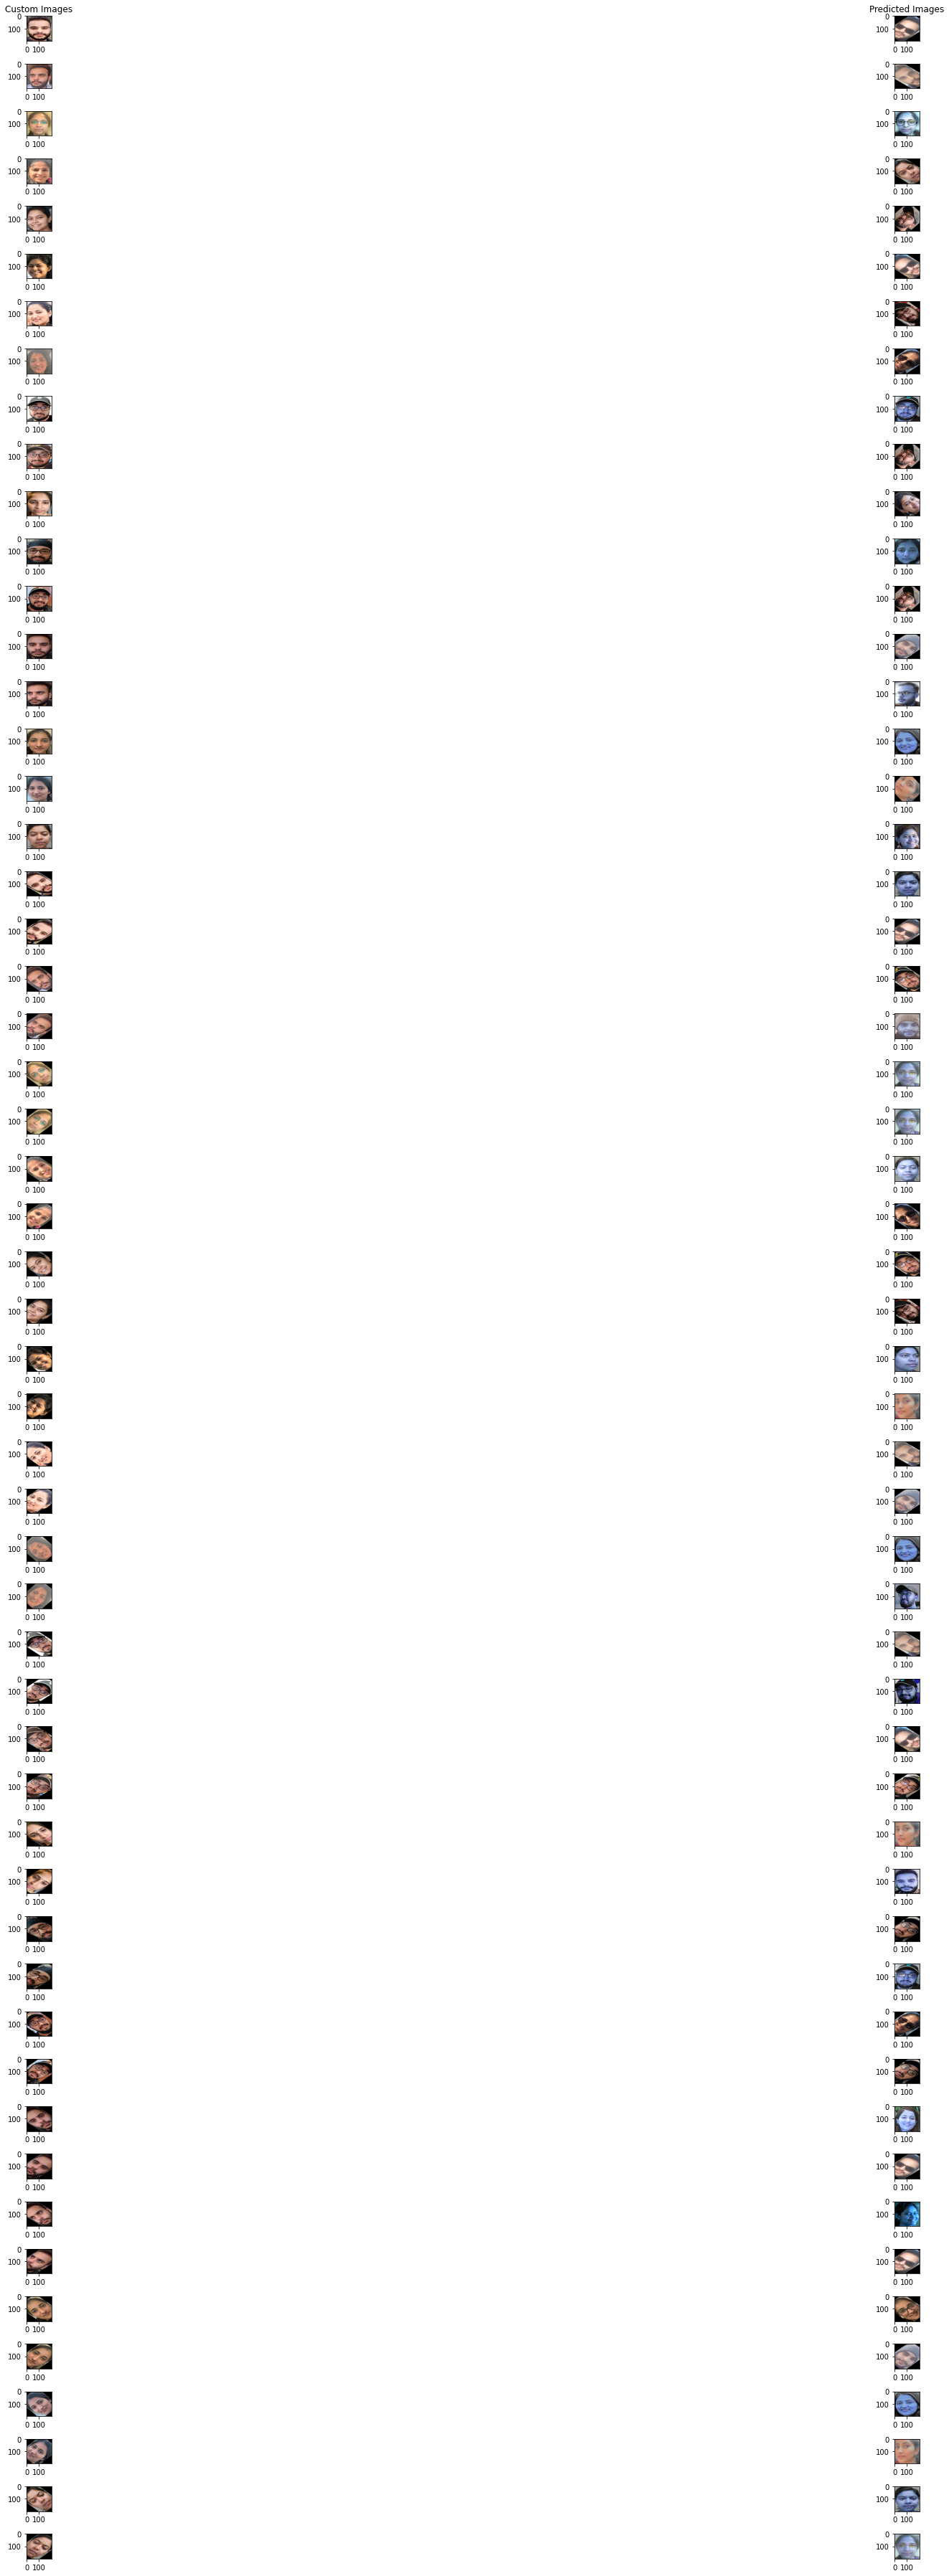

In [38]:
# Ploting the images
import numpy as np
column_names = ('Custom Images', 'Predicted Images')
fig,axes = plt.subplots(nrows = 54, ncols = 2, figsize=(50,50))

for i in range (len(list_custom_images)):
  axes[i,0].imshow(list_custom_images[i])
  axes[i,1].imshow(list_similar_predict_image[i])

for ax, col in zip(axes[0], column_names):
    ax.set_title(col)

fig.tight_layout()
plt.show()
